In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [14]:
in_path = "/Users/Paul/research/files/analysis/csvs/multistep_cifar10.csv"
dfmstep = pd.read_csv(in_path)
dfmstep["sched"] = "MultiStep"
in_path = "/Users/Paul/research/files/analysis/csvs/cifar10_paper_sweep.csv"
dfpaper = pd.read_csv(in_path)
dfpaper["sched"] = "Cosine"
dfpaper = dfpaper[dfpaper.name.str.contains("devries")]
df = pd.concat([dfmstep, dfpaper])
# df = dfpaper

In [15]:
print(len(df))
df = df.dropna(subset=["name", "model"])
print(len(df))

4335
4335


In [16]:
df.groupby("study").count()

,Unnamed: 0,name,model,network,fold,confid,n_test,accuracy,nll,brier_score,failauc,failap_suc,failap_err,mce,ece,e-aurc,aurc,fpr@95tpr,risk@100cov,risk@95cov,risk@90cov,risk@85cov,risk@80cov,risk@75cov,test_risk,test_cov,diff_risk,diff_cov,rstar,val_theta,sched
study,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
iid_study,289,289,289,289,289,289,289,289,289,289,289,289,289,289,289,289,289,289,289,289,289,289,289,289,289,289,289,289,289,289,289
new_class_study_cifar100_original_mode,289,289,289,289,289,289,289,289,0,0,289,289,289,289,289,289,289,289,289,289,289,289,289,289,289,289,289,289,289,289,289
new_class_study_cifar100_proposed_mode,289,289,289,289,289,289,289,289,0,0,289,289,289,289,289,289,289,289,289,289,289,289,289,289,289,289,289,289,289,289,289
new_class_study_svhn_original_mode,289,289,289,289,289,289,289,289,0,0,289,289,289,289,289,289,289,289,289,289,289,289,289,289,289,289,289,289,289,289,289
new_class_study_svhn_proposed_mode,289,289,289,289,289,289,289,289,0,0,289,289,289,289,289,289,289,289,289,289,289,289,289,289,289,289,289,289,289,289,289
new_class_study_tinyimagenet_original_mode,289,289,289,289,289,289,289,289,0,0,289,289,289,289,289,289,289,289,289,289,289,289,289,289,289,289,289,289,289,289,289
new_class_study_tinyimagenet_proposed_mode,289,289,289,289,289,289,289,289,0,0,289,289,289,289,289,289,289,289,289,289,289,289,289,289,289,289,289,289,289,289,289
new_class_study_tinyimagenet_resize_original_mode,289,289,289,289,289,289,289,289,0,0,289,289,289,289,289,289,289,289,289,289,289,289,289,289,289,289,289,289,289,289,289
new_class_study_tinyimagenet_resize_proposed_mode,289,289,289,289,289,289,289,289,0,0,289,289,289,289,289,289,289,289,289,289,289,289,289,289,289,289,289,289,289,289,289


In [17]:
df_clean = df.drop_duplicates(subset=["name", "study", "model", "network", "confid", "sched"], keep="last")

In [18]:
len(df_clean)

4335

In [19]:
df_clean.groupby("name").count()


,Unnamed: 0,study,model,network,fold,confid,n_test,accuracy,nll,brier_score,failauc,failap_suc,failap_err,mce,ece,e-aurc,aurc,fpr@95tpr,risk@100cov,risk@95cov,risk@90cov,risk@85cov,risk@80cov,risk@75cov,test_risk,test_cov,diff_risk,diff_cov,rstar,val_theta,sched
name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
devries_bbresnet50_do0_run1_rew2.2,45,45,45,45,45,45,45,45,21,21,45,45,45,45,45,45,45,45,45,45,45,45,45,45,45,45,45,45,45,45,45
devries_bbresnet50_do0_run2_rew2.2,45,45,45,45,45,45,45,45,21,21,45,45,45,45,45,45,45,45,45,45,45,45,45,45,45,45,45,45,45,45,45
devries_bbresnet50_do0_run3_rew2.2,45,45,45,45,45,45,45,45,21,21,45,45,45,45,45,45,45,45,45,45,45,45,45,45,45,45,45,45,45,45,45
devries_bbvgg13_do0_run1_rew2.2,90,90,90,90,90,90,90,90,42,42,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90
devries_bbvgg13_do0_run2_rew2.2,90,90,90,90,90,90,90,90,42,42,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90
devries_bbvgg13_do0_run3_rew2.2,90,90,90,90,90,90,90,90,42,42,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90
devries_bbvgg13_do0_run4_rew2.2,90,90,90,90,90,90,90,90,42,42,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90
devries_bbvgg13_do0_run5_rew2.2,90,90,90,90,90,90,90,90,42,42,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90
devries_bbvgg13_do1_run1_rew2.2,330,330,330,330,330,330,330,330,154,154,330,330,330,330,330,330,330,330,330,330,330,330,330,330,330,330,330,330,330,330,330


In [20]:

df = df_clean

In [21]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)
df[(df.study == "iid_study") & ~(df.name.str.contains("det"))][["name", "confid", "accuracy", "failauc", "failap_err", "aurc"]].sort_values(by="aurc", ascending=True)

<ipython-input-21-36b5d462abf3>:4: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


,name,confid,accuracy,failauc,failap_err,aurc
8958,devries_bbvgg16_do0_run4_rew2.2,devries,0.94789,0.94280,0.45070,4.77342
152,devries_bbvgg16_do0_run1_rew2.2,devries,0.95089,0.94016,0.43314,4.88977
8862,devries_bbvgg13_do0_run5_rew2.2,devries,0.94833,0.93675,0.41633,5.07027
8907,devries_bbvgg13_do0_run4_rew2.2,devries,0.94889,0.93273,0.37537,5.11282
8952,devries_bbvgg16_do0_run5_rew2.2,devries,0.94589,0.94176,0.43472,5.16052
161,devries_bbvgg16_do0_run3_rew2.2,devries,0.94989,0.93484,0.40083,5.23485
11,devries_bbvgg13_do0_run3_rew2.2,devries,0.94544,0.94005,0.44998,5.24831
8,devries_bbvgg13_do0_run1_rew2.2,devries,0.94644,0.93834,0.42412,5.32765
74,devries_bbvgg13_do0_run2_rew2.2,devries,0.94567,0.93804,0.43128,5.33692
320,devries_bbvgg13_do0_run5_rew2.2,devries,0.94478,0.93788,0.42333,5.34286


In [22]:
##  observations:
##  iid: cosine > multilr. norm equal. vgg16_do_false: good accuracy, horrible auc/aurc. if vgg16, then with do.


In [23]:
meanprops = dict(linestyle='-', linewidth=1, color='k', alpha=0.5)
whiskerprops=dict(linestyle='-', linewidth=0)

In [24]:
df["backbone"] = df.apply(lambda row: row["name"].split("bb")[1].split("_")[0], axis=1)
df["dropout"] = df.apply(lambda row: row["name"].split("do")[1].split("_")[0], axis=1)
df["model"] = df.apply(lambda row: row["name"].split("_")[0], axis=1)

['devries_bbvgg13_do0_run2_rew2.2', 'devries_bbvgg13_do0_run4_rew2.2', 'devries_bbvgg13_do0_run5_rew2.2', 'devries_bbvgg13_do0_run1_rew2.2', 'devries_bbvgg13_do0_run3_rew2.2', 'devries_bbvgg13_do0_run1_rew2.2', 'devries_bbvgg13_do0_run3_rew2.2', 'devries_bbvgg13_do0_run2_rew2.2', 'devries_bbvgg13_do0_run5_rew2.2', 'devries_bbvgg13_do0_run4_rew2.2']


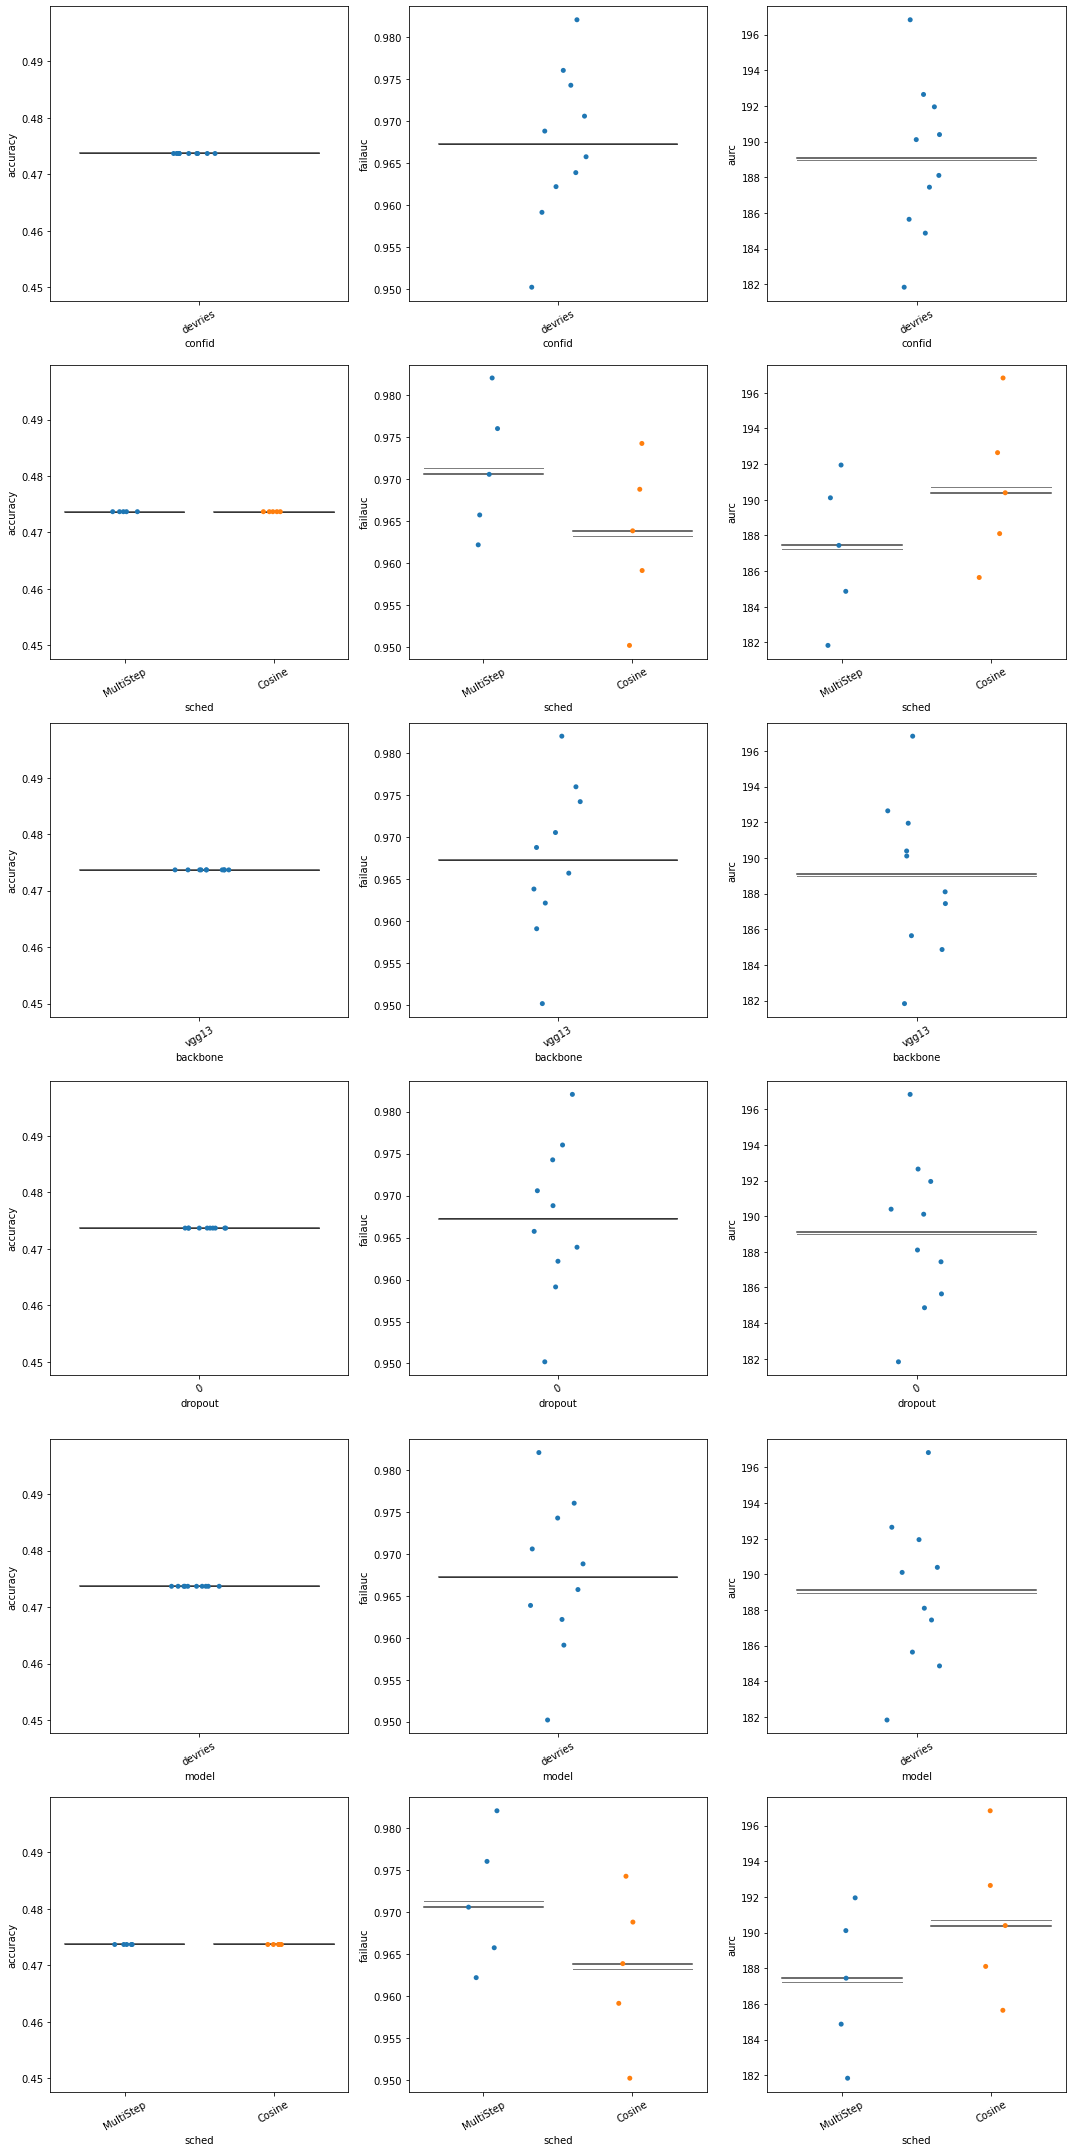

In [31]:

data =  df[(df.study == "new_class_study_tinyimagenet_resize_original_mode") & (df.confid.str.contains("devries")) & (df.dropout.str.contains("0")) & (df.backbone.str.contains("13"))]
# data =  df[(df.study == "new_class_study_tinyimagenet_resize_original_mode")]
#data =  df[(df.study == "iid_study")  & (df.backbone == "vgg16") ]
print(data.name.tolist())
dims = ["confid","sched", "backbone", "dropout", "model", "sched"]
metrics = ["accuracy", "failauc", "aurc"]
scale = 5
f, axs = plt.subplots(nrows=len(dims), ncols=len(metrics), figsize=(len(metrics)*scale, len(dims)*scale))
for xix, dim in enumerate(dims):
    for yix, metric in enumerate(metrics):
        y = metric
        sns.stripplot(ax=axs[xix, yix], x=dim, y=metric, data=data)
        sns.boxplot(ax=axs[xix, yix], x=dim, y=metric, data=data, saturation=0, showbox=False, showcaps=False, showfliers=False, whiskerprops=whiskerprops, showmeans=True, meanprops=meanprops, meanline=True)
        axs[xix, yix].set_xticklabels(axs[xix, yix].get_xticklabels(),rotation=30)

plt.tight_layout()

In [ ]:
data[["name", "confid", "failauc", "failap_err", "aurc", "failap_suc", "accuracy"]].sort_values(by="aurc", ascending=True)

In [ ]:
data["aurc_iid_rank"] = data.d TODO RANK!!

In [ ]:
df[(df.study == "new_class_study_tinyimagenet_resize_original_mode")  & (df.confid=="devries")].name
# devries_sweep|ultimate_cifar_fix_sweep/devries|200fixed